In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from scipy import stats
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR

# Problem 1

In [68]:
canc_feats = pd.DataFrame(load_breast_cancer().data)
canc_labels = np.reshape(load_breast_cancer().target, (np.size(load_breast_cancer().target), 1))
canc_scaled = StandardScaler().fit_transform(canc_feats)
canc_data = np.concatenate([canc_scaled, canc_labels], axis=1)

In [69]:
linear_model = SVC(kernel = "linear", C = 1000)
poly_model = SVC(kernel = "poly", C = 1000)
rbf_model = SVC(kernel = "rbf", C = 1000)
sigmoid_model = SVC(kernel = "sigmoid", C = 1000)

canc_train, canc_test = train_test_split(canc_data, train_size = 0.8, test_size = 0.2)

canc_train_results = canc_train[:,-1]
canc_train = np.delete(canc_train, canc_train.shape[1] - 1, -1)
canc_test_results = canc_test[:,-1]
canc_test = np.delete(canc_test, canc_test.shape[1] - 1, -1)

In [70]:
pca_data = []
pca_val = []
for n in range(0, canc_train.shape[1]+1):
    pca = PCA(n_components=n)
    pca_data.append(pca.fit_transform(canc_train))
    pca_val.append(pca.fit_transform(canc_test))


In [71]:
max_test_acc_linear = 0
n_max_test_linear = 0
linear_acc = []

max_test_acc_poly = 0
n_max_test_poly = 0
poly_acc = []

max_test_acc_rbf = 0
n_max_test_rbf = 0
rbf_acc = []

max_test_acc_sigmoid = 0
n_max_test_sigmoid = 0
sigmoid_acc = []

for n in range(1, canc_train.shape[1]+1):
    
    linear_model.fit(pca_data[n], canc_train_results)
    linear_acc.append(linear_model.score(pca_val[n], canc_test_results))
    
    poly_model.fit(pca_data[n], canc_train_results)
    poly_acc.append(poly_model.score(pca_val[n], canc_test_results))
    
    rbf_model.fit(pca_data[n], canc_train_results)
    rbf_acc.append(rbf_model.score(pca_val[n], canc_test_results))
    
    sigmoid_model.fit(pca_data[n], canc_train_results)
    sigmoid_acc.append(sigmoid_model.score(pca_val[n], canc_test_results))
    
    
    if linear_model.score(pca_val[n], canc_test_results) > max_test_acc_linear:
        max_test_acc_linear = linear_model.score(pca_val[n], canc_test_results)
        n_max_test_linear = n
    
    if poly_model.score(pca_val[n], canc_test_results) > max_test_acc_poly:
        max_test_acc_poly = poly_model.score(pca_val[n], canc_test_results)
        n_max_test_poly = n
    
    if rbf_model.score(pca_val[n], canc_test_results) > max_test_acc_rbf:
        max_test_acc_rbf = rbf_model.score(pca_val[n], canc_test_results)
        n_max_test_rbf = n
        
    if sigmoid_model.score(pca_val[n], canc_test_results) > max_test_acc_sigmoid:
        max_test_acc_sigmoid = sigmoid_model.score(pca_val[n], canc_test_results)
        n_max_test_sigmoid = n
    
    print(f"""
Linear Model:
N = {n}
Training Accuracy: {linear_model.score(pca_data[n], canc_train_results)}
Test Accuracy: {linear_model.score(pca_val[n], canc_test_results)}
""")
    print(f"""
Poly Model:
N = {n}
Training Accuracy: {poly_model.score(pca_data[n], canc_train_results)}
Test Accuracy: {poly_model.score(pca_val[n], canc_test_results)}
""")
    print(f"""
RBF Model:
N = {n}
Training Accuracy: {rbf_model.score(pca_data[n], canc_train_results)}
Test Accuracy: {rbf_model.score(pca_val[n], canc_test_results)}
""")
    print(f"""
Sigmoid Model:
N = {n}
Training Accuracy: {sigmoid_model.score(pca_data[n], canc_train_results)}
Test Accuracy: {sigmoid_model.score(pca_val[n], canc_test_results)}
""")

print(f"""
Max Test Accuracy for Linear Model: {max_test_acc_linear}
N: {n_max_test_linear}

Max Test Accuracy for Linear Model: {max_test_acc_poly}
N: {n_max_test_poly}

Max Test Accuracy for Linear Model: {max_test_acc_rbf}
N: {n_max_test_rbf}

Max Test Accuracy for Linear Model: {max_test_acc_sigmoid}
N: {n_max_test_sigmoid}
""")



Linear Model:
N = 1
Training Accuracy: 0.9274725274725275
Test Accuracy: 0.8596491228070176


Poly Model:
N = 1
Training Accuracy: 0.9010989010989011
Test Accuracy: 0.8245614035087719


RBF Model:
N = 1
Training Accuracy: 0.9274725274725275
Test Accuracy: 0.8596491228070176


Sigmoid Model:
N = 1
Training Accuracy: 0.8901098901098901
Test Accuracy: 0.8333333333333334


Linear Model:
N = 2
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.9122807017543859


Poly Model:
N = 2
Training Accuracy: 0.9362637362637363
Test Accuracy: 0.9035087719298246


RBF Model:
N = 2
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.9122807017543859


Sigmoid Model:
N = 2
Training Accuracy: 0.8857142857142857
Test Accuracy: 0.8421052631578947


Linear Model:
N = 3
Training Accuracy: 0.9560439560439561
Test Accuracy: 0.9210526315789473


Poly Model:
N = 3
Training Accuracy: 0.9604395604395605
Test Accuracy: 0.9035087719298246


RBF Model:
N = 3
Training Accuracy: 0.9758241758241758
Test Accuracy:


Poly Model:
N = 26
Training Accuracy: 1.0
Test Accuracy: 0.8771929824561403


RBF Model:
N = 26
Training Accuracy: 1.0
Test Accuracy: 0.8947368421052632


Sigmoid Model:
N = 26
Training Accuracy: 0.9230769230769231
Test Accuracy: 0.8508771929824561


Linear Model:
N = 27
Training Accuracy: 1.0
Test Accuracy: 0.8771929824561403


Poly Model:
N = 27
Training Accuracy: 1.0
Test Accuracy: 0.8771929824561403


RBF Model:
N = 27
Training Accuracy: 1.0
Test Accuracy: 0.8947368421052632


Sigmoid Model:
N = 27
Training Accuracy: 0.9230769230769231
Test Accuracy: 0.8508771929824561


Linear Model:
N = 28
Training Accuracy: 1.0
Test Accuracy: 0.8771929824561403


Poly Model:
N = 28
Training Accuracy: 1.0
Test Accuracy: 0.8771929824561403


RBF Model:
N = 28
Training Accuracy: 1.0
Test Accuracy: 0.8947368421052632


Sigmoid Model:
N = 28
Training Accuracy: 0.9230769230769231
Test Accuracy: 0.8596491228070176


Linear Model:
N = 29
Training Accuracy: 1.0
Test Accuracy: 0.8771929824561403


Poly M

Text(0.5, 1.0, 'Figure 1 - Accuracy for Various SVC Kerneling for Problem 1')

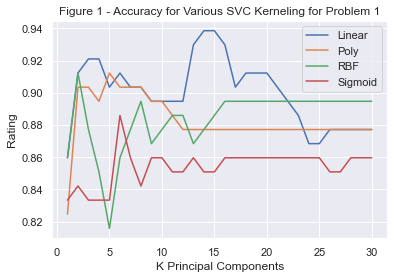

In [72]:
linear_model.fit(pca_data[n_max_test_linear], canc_train_results)
poly_model.fit(pca_data[n_max_test_poly], canc_train_results)
rbf_model.fit(pca_data[n_max_test_rbf], canc_train_results)
sigmoid_model.fit(pca_data[n_max_test_sigmoid], canc_train_results)

xx = range(1, canc_train.shape[1]+1)
plot1 = plt.figure(1)
plt.plot(xx, linear_acc)
plt.plot(xx, poly_acc)
plt.plot(xx, rbf_acc)
plt.plot(xx, sigmoid_acc)
plt.legend(['Linear', 'Poly', 'RBF', 'Sigmoid'], loc='upper right')
plt.xlabel('K Principal Components')
plt.ylabel('Rating')
plt.title("Figure 1 - Accuracy for Various SVC Kerneling for Problem 1")

# Problem 2

In [73]:
feat_list = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', "hotwaterheating", "airconditioning", 'parking', 'prefarea', 'price']
house = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'), columns = feat_list)
house.replace("yes", 1, inplace=True)
house.replace("no", 0, inplace=True)
house_scaled = StandardScaler().fit_transform(house)
house_scaled.shape

(545, 12)

In [74]:
house_results = house_scaled[:,-1]
house_results
house_scaled = np.delete(house_scaled, house_scaled.shape[1]-1, -1)
print(house_results.shape, house_scaled.shape)

(545,) (545, 11)


In [75]:
house_train, house_test = train_test_split(house_scaled, train_size = 0.8, test_size = 0.2)

house_train_results = house_train[:,-1]
house_train = np.delete(house_train, house_train.shape[1] - 1, -1)
house_test_results = house_test[:,-1]
house_test = np.delete(house_test, house_test.shape[1] - 1, -1)

In [76]:
model_rbf = SVR(kernel = "rbf", gamma = 1, C = 100)
model_lin = SVR(kernel = "linear", C = 100)
model_poly = SVR(kernel = "poly", C = 100, degree = 2)
results_rbf = model_rbf.fit(house_train, house_train_results).predict(house_test)
results_lin = model_lin.fit(house_train, house_train_results).predict(house_test)
results_poly = model_poly.fit(house_train, house_train_results).predict(house_test)

In [80]:
pca_data = []
pca_val = []
for n in range(1, house_train.shape[1]+1):
    pca = PCA(n_components=n)
    pca_data.append(pca.fit_transform(house_train))
    pca_val.append(pca.fit_transform(house_test))

In [78]:
max_test_acc_linear = 0
n_max_test_linear = 0
linear_acc = []

max_test_acc_poly = 0
n_max_test_poly = 0
poly_acc = []

max_test_acc_rbf = 0
n_max_test_rbf = 0
rbf_acc = []

for n in range(0, house_train.shape[1]):
    
    model_lin.fit(pca_data[n], house_train_results)
    linear_acc.append(model_lin.score(pca_val[n], house_test_results))
    
    model_poly.fit(pca_data[n], house_train_results)
    poly_acc.append(model_poly.score(pca_val[n], house_test_results))
    
    model_rbf.fit(pca_data[n], house_train_results)
    rbf_acc.append(model_rbf.score(pca_val[n], house_test_results))
        
    if model_lin.score(pca_val[n], house_test_results) > max_test_acc_linear:
        max_test_acc_linear = model_lin.score(pca_val[n], house_test_results)
        n_max_test_linear = n
    
    if model_poly.score(pca_val[n], house_test_results) > max_test_acc_poly:
        max_test_acc_poly = model_poly.score(pca_val[n], house_test_results)
        n_max_test_poly = n
    
    if model_rbf.score(pca_val[n], house_test_results) > max_test_acc_rbf:
        max_test_acc_rbf = model_rbf.score(pca_val[n], house_test_results)
        n_max_test_rbf = n
    
    print(f"""
Linear Model:
N = {n+1}
Training Accuracy: {model_lin.score(pca_data[n], house_train_results)}
Test Accuracy: {model_lin.score(pca_val[n], house_test_results)}
""")
    print(f"""
Poly Model:
N = {n+1}
Training Accuracy: {model_poly.score(pca_data[n], house_train_results)}
Test Accuracy: {model_poly.score(pca_val[n], house_test_results)}
""")
    print(f"""
RBF Model:
N = {n+1}
Training Accuracy: {model_rbf.score(pca_data[n], house_train_results)}
Test Accuracy: {model_rbf.score(pca_val[n], house_test_results)}
""")


Linear Model:
N = 1
Training Accuracy: -0.19790798568361478
Test Accuracy: -0.2411481555634165


Poly Model:
N = 1
Training Accuracy: -0.19759669319355622
Test Accuracy: -0.24082589073091554


RBF Model:
N = 1
Training Accuracy: -0.18374172108706155
Test Accuracy: -0.23104156950984422


Linear Model:
N = 2
Training Accuracy: -0.19775701455756334
Test Accuracy: -0.24097626277919448


Poly Model:
N = 2
Training Accuracy: -0.19776701084806936
Test Accuracy: -0.24093868716128042


RBF Model:
N = 2
Training Accuracy: 0.10191700852602104
Test Accuracy: -0.29175484977458743


Linear Model:
N = 3
Training Accuracy: -0.19771941404379767
Test Accuracy: -0.24093130557404718


Poly Model:
N = 3
Training Accuracy: -0.19776682697716308
Test Accuracy: -0.24095395780906226


RBF Model:
N = 3
Training Accuracy: 0.5311582668567565
Test Accuracy: -0.5268530283438619


Linear Model:
N = 4
Training Accuracy: -0.19771208000377416
Test Accuracy: -0.24090463276399232


Poly Model:
N = 4
Training Accuracy: -0

Text(0.5, 1.0, 'Figure 2 - Accuracy for Various SVR Kerneling for Problem 2')

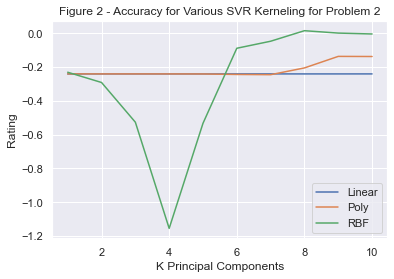

In [84]:
xx = range(1, house_train.shape[1]+1)
plot1 = plt.figure(2)
plt.plot(xx, linear_acc)
plt.plot(xx, poly_acc)
plt.plot(xx, rbf_acc)
plt.legend(['Linear', 'Poly', 'RBF'], loc='lower right')
plt.xlabel('K Principal Components')
plt.ylabel('Rating')
plt.title("Figure 2 - Accuracy for Various SVR Kerneling for Problem 2")